In [ ]:
!pip install pandas numpy matplotlib seaborn plotly scikit-learn


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

In [18]:
plt.style.use('default')
sns.set_palette("husl")
warnings.filterwarnings('ignore')


In [19]:
filename = "World Happiness Report 2024.csv"

# Load the data

In [20]:
try:
    df = pd.read_csv(filename)
    print("✅ Dataset loaded successfully!")
    print(f"📊 Dataset shape: {df.shape[0]} rows and {df.shape[1]} columns")
except:
    print("❌ File not found! Please download the dataset from Kaggle")
    print("Link: https://www.kaggle.com/datasets/ajaypalsinghlo/world-happiness-report-2024")


✅ Dataset loaded successfully!
📊 Dataset shape: 143 rows and 11 columns


In [ ]:
print("📋 First 5 rows of our dataset:")
print(df.head())

In [22]:
print("ℹ️ Dataset Information:")
print(f"Number of countries: {df['Country name'].nunique()}")
print(f"Number of columns: {len(df.columns)}")
print("\n📊 Column names:")
for i, col in enumerate(df.columns, 1):
    print(f"{i}. {col}")

ℹ️ Dataset Information:
Number of countries: 143
Number of columns: 11

📊 Column names:
1. Country name
2. Ladder score
3. upperwhisker
4. lowerwhisker
5. Explained by: Log GDP per capita
6. Explained by: Social support
7. Explained by: Healthy life expectancy
8. Explained by: Freedom to make life choices
9. Explained by: Generosity
10. Explained by: Perceptions of corruption
11. Dystopia + residual


# Check Data Types and Missing Values

In [23]:
print("🔍 Data Types:")
print(df.dtypes)
print("\n")

print("❓ Missing Values:")
missing_data = df.isnull().sum()
for col, missing in missing_data.items():
    if missing > 0:
        print(f"{col}: {missing} missing values")

if missing_data.sum() == 0:
    print("✅ No missing values found!")

🔍 Data Types:
Country name                                   object
Ladder score                                  float64
upperwhisker                                  float64
lowerwhisker                                  float64
Explained by: Log GDP per capita              float64
Explained by: Social support                  float64
Explained by: Healthy life expectancy         float64
Explained by: Freedom to make life choices    float64
Explained by: Generosity                      float64
Explained by: Perceptions of corruption       float64
Dystopia + residual                           float64
dtype: object


❓ Missing Values:
Explained by: Log GDP per capita: 3 missing values
Explained by: Social support: 3 missing values
Explained by: Healthy life expectancy: 3 missing values
Explained by: Freedom to make life choices: 3 missing values
Explained by: Generosity: 3 missing values
Explained by: Perceptions of corruption: 3 missing values
Dystopia + residual: 3 missing values


# Basic Statistics

In [ ]:
print("📈 Basic Statistics:")
print(df.describe().round(2))

# Clean the Data (Simple Version)

In [25]:
# Create a copy of our data for cleaning
df_clean = df.copy()

# Fill missing values with median for numbers
numeric_columns = df_clean.select_dtypes(include=[np.number]).columns
for col in numeric_columns:
    if df_clean[col].isnull().sum() > 0:
        median_value = df_clean[col].median()
        df_clean[col].fillna(median_value, inplace=True)
        print(f"✅ Filled missing values in {col} with median: {median_value:.2f}")

# Remove any duplicate rows
before_cleaning = len(df_clean)
df_clean = df_clean.drop_duplicates()
after_cleaning = len(df_clean)

print(f"🧹 Removed {before_cleaning - after_cleaning} duplicate rows")
print(f"✅ Clean dataset has {len(df_clean)} rows")


✅ Filled missing values in Explained by: Log GDP per capita with median: 1.43
✅ Filled missing values in Explained by: Social support with median: 1.24
✅ Filled missing values in Explained by: Healthy life expectancy with median: 0.55
✅ Filled missing values in Explained by: Freedom to make life choices with median: 0.64
✅ Filled missing values in Explained by: Generosity with median: 0.14
✅ Filled missing values in Explained by: Perceptions of corruption with median: 0.12
✅ Filled missing values in Dystopia + residual with median: 1.64
🧹 Removed 0 duplicate rows
✅ Clean dataset has 143 rows


# Happiest Countries

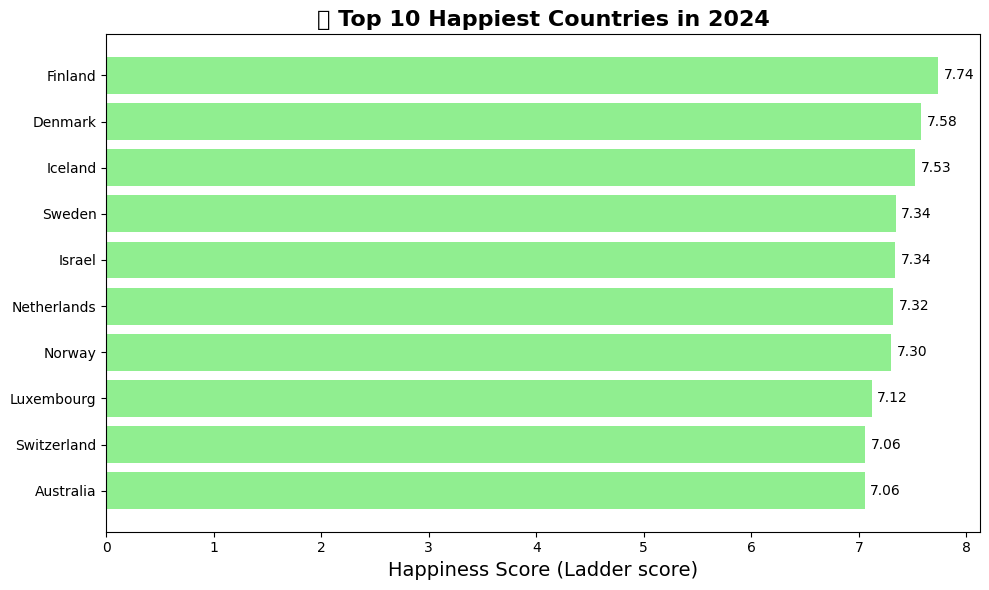

🥇 The happiest country is: Finland


In [ ]:
plt.figure(figsize=(10, 6))

# Get top 10 happiest countries
top_10_happy = df_clean.nlargest(10, 'Ladder score')

# Create a horizontal bar chart
plt.barh(top_10_happy['Country name'], top_10_happy['Ladder score'], color='lightgreen')
plt.title('🏆 Top 10 Happiest Countries in 2024', fontsize=16, fontweight='bold')
plt.xlabel('Happiness Score (Ladder score)', fontsize=14)
plt.gca().invert_yaxis() 

# Add score labels on bars
for i, (country, score) in enumerate(zip(top_10_happy['Country name'], top_10_happy['Ladder score'])):
    plt.text(score + 0.05, i, f'{score:.2f}', va='center')

plt.tight_layout()
plt.show()

print("🥇 The happiest country is:", top_10_happy.iloc[0]['Country name'])

# Bottom 10 Countries

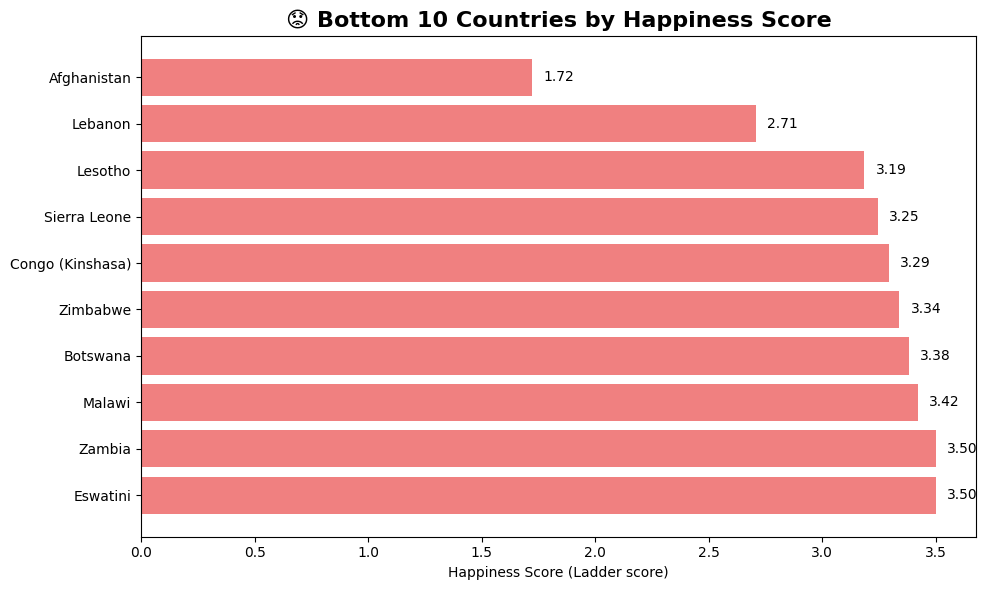

In [30]:
plt.figure(figsize=(10, 6))

# Get bottom 10 countries
bottom_10 = df_clean.nsmallest(10, 'Ladder score')

# Create a horizontal bar chart
plt.barh(bottom_10['Country name'], bottom_10['Ladder score'], color='lightcoral')
plt.title('😟 Bottom 10 Countries by Happiness Score', fontsize=16, fontweight='bold')
plt.xlabel('Happiness Score (Ladder score)')
plt.gca().invert_yaxis()

# Add score labels
for i, (country, score) in enumerate(zip(bottom_10['Country name'], bottom_10['Ladder score'])):
    plt.text(score + 0.05, i, f'{score:.2f}', va='center')

plt.tight_layout()
plt.show()

# Distribution of Happiness Scores

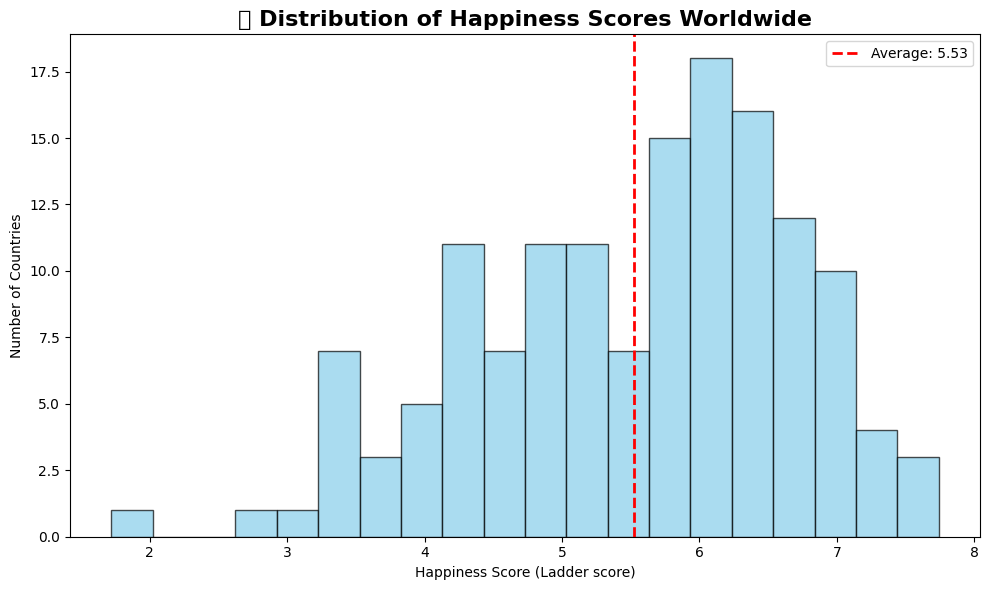

🌍 Average happiness score worldwide: 5.53
📊 Happiest score: 7.74
📊 Lowest score: 1.72


In [31]:
plt.figure(figsize=(10, 6))

# Create histogram
plt.hist(df_clean['Ladder score'], bins=20, color='skyblue', alpha=0.7, edgecolor='black')
plt.title('📊 Distribution of Happiness Scores Worldwide', fontsize=16, fontweight='bold')
plt.xlabel('Happiness Score (Ladder score)')
plt.ylabel('Number of Countries')

# Add average line
avg_happiness = df_clean['Ladder score'].mean()
plt.axvline(avg_happiness, color='red', linestyle='--', linewidth=2, label=f'Average: {avg_happiness:.2f}')
plt.legend()

plt.tight_layout()
plt.show()

print(f"🌍 Average happiness score worldwide: {avg_happiness:.2f}")
print(f"📊 Happiest score: {df_clean['Ladder score'].max():.2f}")
print(f"📊 Lowest score: {df_clean['Ladder score'].min():.2f}")


# Social Support vs Happiness

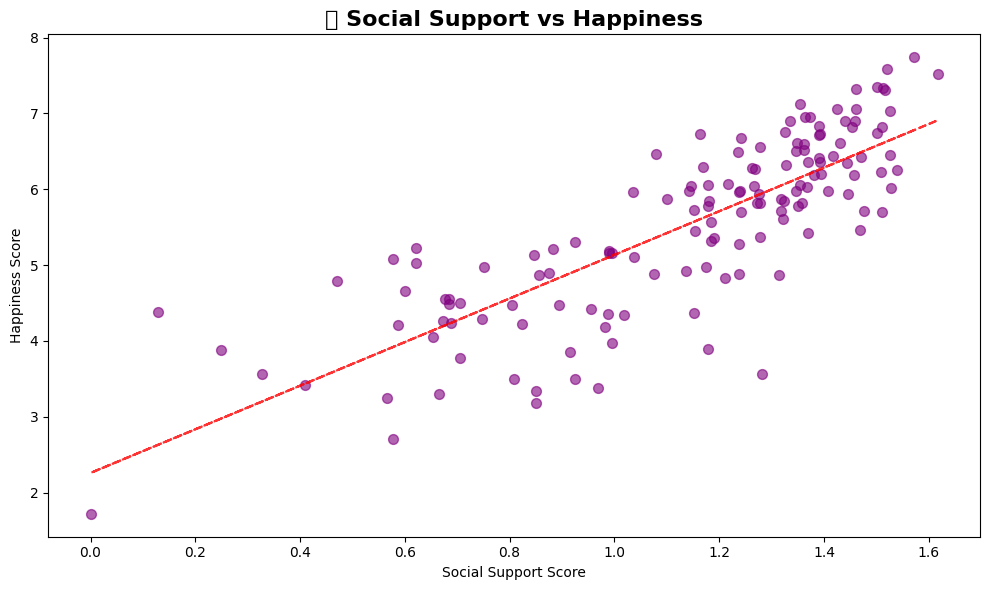

💡 Correlation between Social Support and Happiness: 0.810


In [38]:
plt.figure(figsize=(10, 6))

plt.scatter(df_clean['Explained by: Social support'], df_clean['Ladder score'], 
           color='purple', alpha=0.6, s=50)

plt.title('👥 Social Support vs Happiness', fontsize=16, fontweight='bold')
plt.xlabel('Social Support Score')
plt.ylabel('Happiness Score')

# Add trend line
z = np.polyfit(df_clean['Explained by: Social support'], df_clean['Ladder score'], 1)
p = np.poly1d(z)
plt.plot(df_clean['Explained by: Social support'], p(df_clean['Explained by: Social support']), "r--", alpha=0.8)

plt.tight_layout()
plt.show()

correlation = df_clean['Explained by: Social support'].corr(df_clean['Ladder score'])
print(f"💡 Correlation between Social Support and Happiness: {correlation:.3f}")

# What Makes Countries Happy? (Correlation Analysis)

In [40]:
# Get all numeric columns
numeric_cols = df_clean.select_dtypes(include=[np.number]).columns

# Calculate correlations with happiness
correlations = df_clean[numeric_cols].corr()['Ladder score'].sort_values(ascending=False)

# Remove self-correlation
correlations = correlations.drop('Ladder score')

print("🎯 What makes countries happy? (Correlation with Ladder score)")
print("=" * 50)
for factor, corr in correlations.items():
    if corr > 0:
        print(f"✅ {factor}: {corr:.3f} (Positive)")
    else:
        print(f"❌ {factor}: {corr:.3f} (Negative)")

🎯 What makes countries happy? (Correlation with Ladder score)
✅ lowerwhisker: 1.000 (Positive)
✅ upperwhisker: 1.000 (Positive)
✅ Explained by: Social support: 0.810 (Positive)
✅ Explained by: Log GDP per capita: 0.767 (Positive)
✅ Explained by: Healthy life expectancy: 0.758 (Positive)
✅ Explained by: Freedom to make life choices: 0.643 (Positive)
✅ Dystopia + residual: 0.532 (Positive)
✅ Explained by: Perceptions of corruption: 0.451 (Positive)
✅ Explained by: Generosity: 0.130 (Positive)


# Visualize Correlations

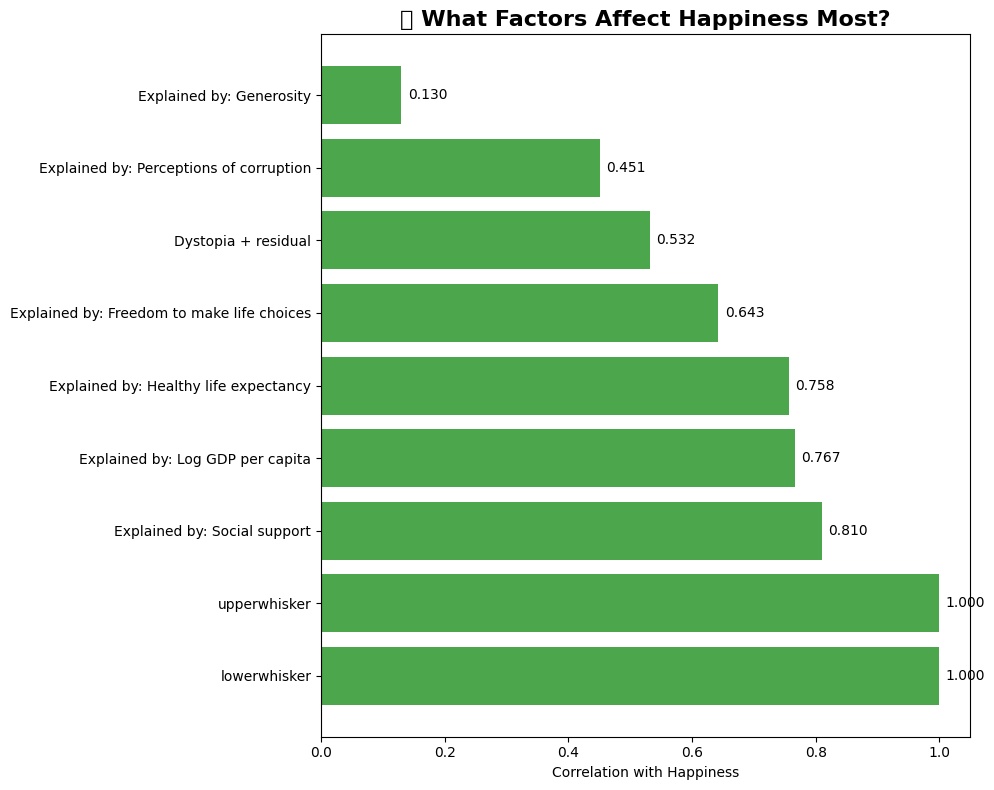

In [41]:
plt.figure(figsize=(10, 8))

# Create horizontal bar chart
colors = ['green' if x > 0 else 'red' for x in correlations.values]
plt.barh(range(len(correlations)), correlations.values, color=colors, alpha=0.7)

plt.title('🎯 What Factors Affect Happiness Most?', fontsize=16, fontweight='bold')
plt.xlabel('Correlation with Happiness')
plt.yticks(range(len(correlations)), correlations.index)
plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)

# Add value labels
for i, v in enumerate(correlations.values):
    plt.text(v + 0.01 if v > 0 else v - 0.01, i, f'{v:.3f}', 
             va='center', ha='left' if v > 0 else 'right')

plt.tight_layout()
plt.show()